In [1]:
%run "C:/Users/ssiva/OneDrive/Documents/Machine_Learning/Machine_Learning/Machine_Learning_Algorithms/Machine_Learning_Algorithms.ipynb"

Available functions:


create_random_df(model,nrows,ncols,nclasses,target_multiplier = 1),

find_cols_to_ignore(df,thresh_cat = 0.02,cols_to_ignore = None),

impute_cols(df,k=None,thresh_null_cat = 0.02,cols_to_ignore = None),

num_unique_values_in_cols(df,cols = None),

remove_outliers(df_in,outlier_cols,thresh_cat = 0.02,remove = True),

convert_cat(df, cat_cols,output_col=None),

normalize(df,cols_to_ignore = None,target_col = None),

split_df(df,test_size = 0.3,df_to_return = 'df_train'),

shuffled_split_dfs(df,test_size = 0.3),

check_accuracy(df = None,pred_df = None, test_df = None, algo = 'lin',target_class = None),

stoch_grad_desc(dataset,output_col,cols_to_ignore = None,alpha = 0.1,epoch = 10,algo = 'lin',initial_coeffs = 1),

make_predictions(dataset, coeff_list, output_col,cols_to_ignore = None,algo = 'lin'),

knn(df_train,new_pts_list,dep_col,k = 7,only_pred_df = True),

kmeans(df,k=3,epoch = 1),

cart(df)


Additional Info:

seaborn_palettes is a list of all seaborn pale

In [2]:
pd.set_option('display.max_columns',80)

In [3]:
housing = pd.read_csv(r"Ames_housing_train.csv")

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
housing.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


### Null Value Treatment

In [7]:
housing.isnull().sum()[housing.isnull().sum() != 0].sort_values(ascending = False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

#### Dropping the 'PoolQC', 'MiscFeature', and 'Alley' columns since they have a large number of null values

In [8]:
housing.drop(['PoolQC','MiscFeature','Alley'],axis = 1,inplace = True)

### Treating all other null value columns

In [9]:
clean_housing = impute_cols(housing,cols_to_ignore=['SalePrice'])

C:\Users\ssiva\Anaconda3\lib\site-packages\ipykernel_launcher.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Program took 0.0 hr(s), 0.0 min(s), 8.976076364517212 sec(s) to run
Program took 0.0 hr(s), 0.0 min(s), 5.599029541015625 sec(s) to run
Program took 0.0 hr(s), 0.0 min(s), 0.5166566371917725 sec(s) to run
Program took 0.0 hr(s), 0.0 min(s), 0.515587329864502 sec(s) to run
Program took 0.0 hr(s), 0.0 min(s), 0.47370123863220215 sec(s) to run
Program took 0.0 hr(s), 0.0 min(s), 0.4797194004058838 sec(s) to run
Program took 0.0 hr(s), 0.0 min(s), 0.24836397171020508 sec(s) to run
Program took 0.0 hr(s), 0.0 min(s), 0.23533987998962402 sec(s) to run
Program took 0.0 hr(s), 0.0 min(s), 0.4478030204772949 sec(s) to run
Program took 0.0 hr(s), 0.0 min(s), 0.23444414138793945 sec(s) to run
Program took 0.0 hr(s), 0.0 min(s), 0.2293548583984375 sec(s) to run
Program took 0.0 hr(s), 0.0 min(s), 0.056873321533203125 sec(s) to run
Program took 0.0 hr(s), 0.0 min(s), 0.011003494262695312 sec(s) to run


In [10]:
clean_housing.isna().sum()[clean_housing.isna().sum() != 0]

Series([], dtype: int64)

### Now that the dataset is clean, I will perform some EDA on the dataset

In [11]:
clean_housing.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,GdPrv,0,2,2008,WD,Normal,208500


In [12]:
clean_housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.041096,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.686986,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.533562,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024031,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569114,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.994850,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
clean_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

# EDA

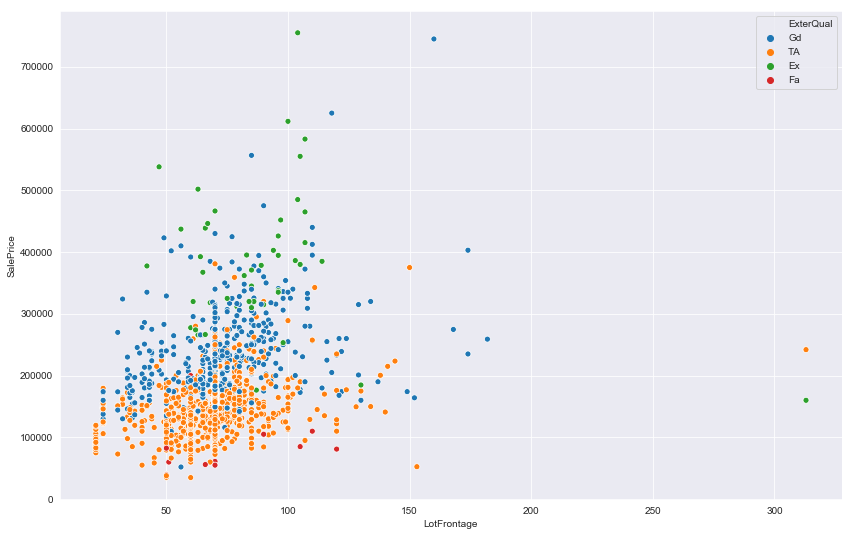

In [14]:
sns.scatterplot(x= 'LotFrontage',y = 'SalePrice',data = clean_housing,hue = 'ExterQual')

### There are some outliers.  I am removing outliers from all numerical columns

In [15]:
clean_housing_no_outliers = remove_outliers(clean_housing)

In [16]:
clean_housing_no_outliers.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,GdPrv,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,GdPrv,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,MnPrv,0,9,2008,WD,Normal,223500
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,GdPrv,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Gd,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,MnPrv,700,10,2009,WD,Normal,143000


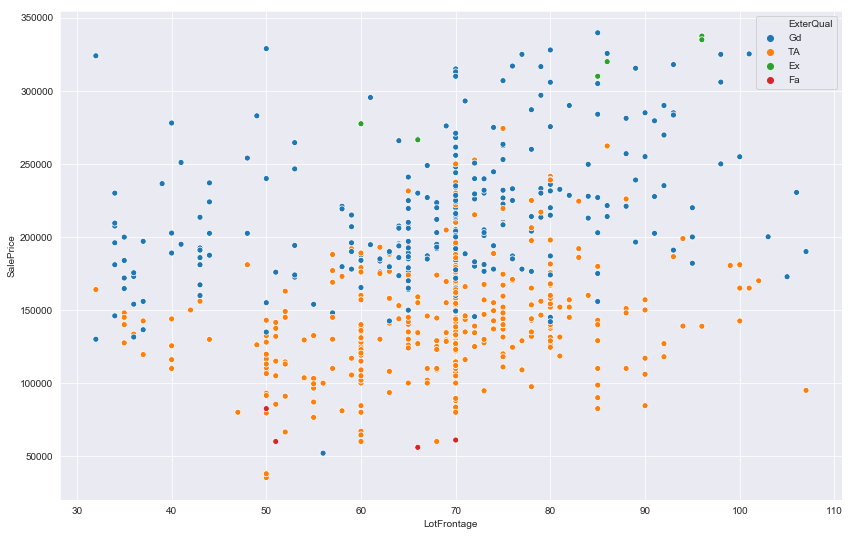

In [17]:
sns.scatterplot(x= 'LotFrontage',y = 'SalePrice',data = clean_housing_no_outliers,hue = 'ExterQual')

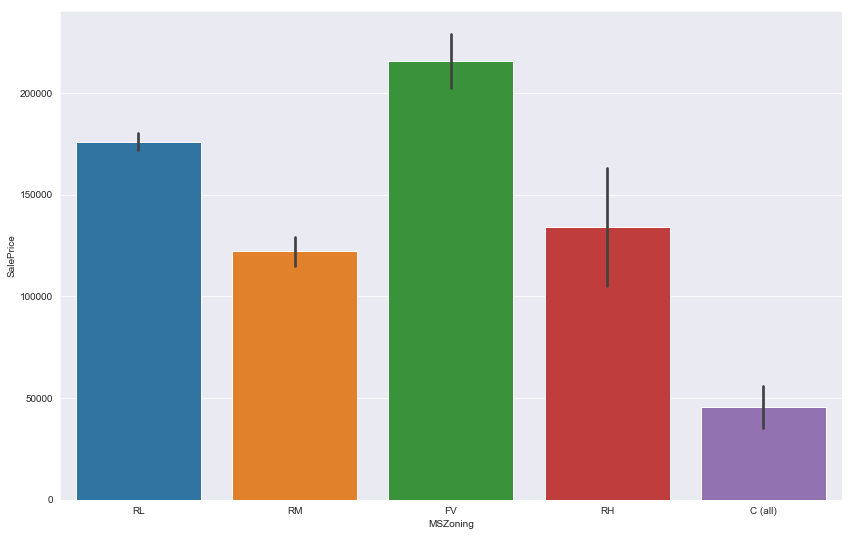

In [18]:
sns.barplot(data = clean_housing_no_outliers,x = 'MSZoning',y = 'SalePrice')

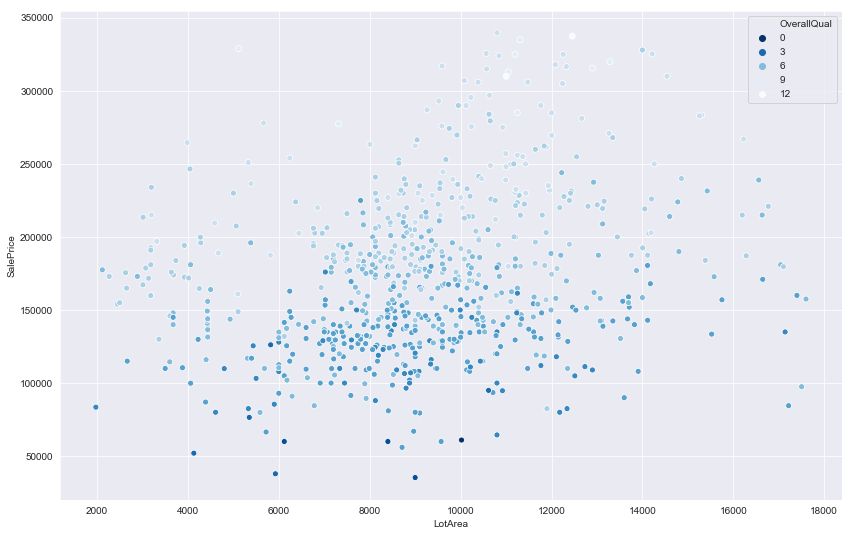

In [19]:
sns.scatterplot(x= 'LotArea',y = 'SalePrice',data = clean_housing_no_outliers,hue = 'OverallQual',palette='Blues_r')

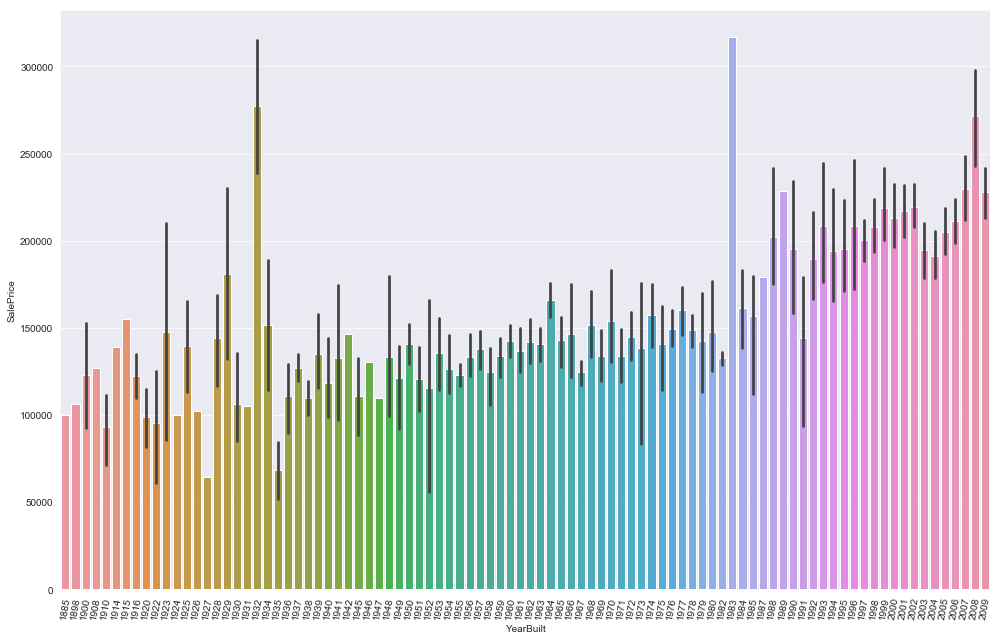

In [20]:
sns.barplot(data = clean_housing_no_outliers,x = 'YearBuilt',y= 'SalePrice')
plt.xticks(rotation = 80)
plt.tight_layout()

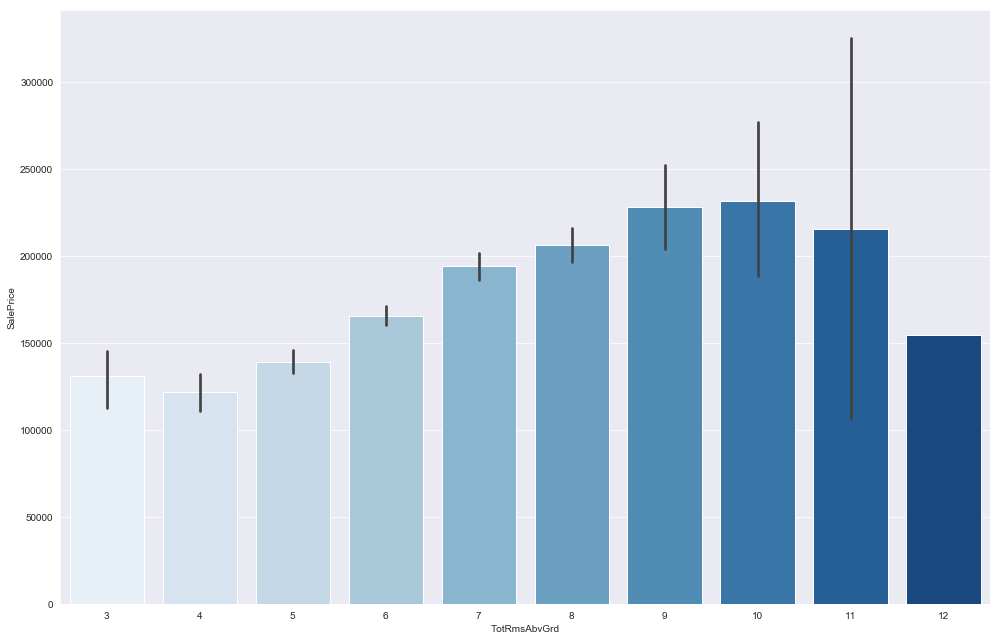

In [21]:
sns.barplot(data = clean_housing_no_outliers,x = 'TotRmsAbvGrd',y= 'SalePrice',palette = 'Blues')
plt.tight_layout()

# Buidling My Linear Regression Model

### Now I am finding the columns to ignore when normalizing

In [22]:
cols_to_ignore = find_cols_to_ignore(clean_housing_no_outliers)

In [23]:
cols_to_ignore

['SaleCondition',
 'BsmtFullBath',
 'KitchenAbvGr',
 'BsmtCond',
 'BedroomAbvGr',
 'BsmtFinType1',
 '3SsnPorch',
 'SaleType',
 'HalfBath',
 'LotShape',
 'Condition1',
 'FullBath',
 'OverallCond',
 'BsmtFinSF2',
 'ScreenPorch',
 'LotConfig',
 'LandSlope',
 'Heating',
 'Functional',
 'LowQualFinSF',
 'Electrical',
 'BsmtExposure',
 'FireplaceQu',
 'GarageQual',
 'BsmtQual',
 'Street',
 'RoofStyle',
 'ExterQual',
 'EnclosedPorch',
 'LandContour',
 'MoSold',
 'Condition2',
 'TotRmsAbvGrd',
 'BldgType',
 'Fireplaces',
 'CentralAir',
 'GarageFinish',
 'HeatingQC',
 'BsmtHalfBath',
 'GarageCars',
 'Neighborhood',
 'GarageCond',
 'KitchenQual',
 'Exterior2nd',
 'MSZoning',
 'Utilities',
 'Foundation',
 'GarageType',
 'OverallQual',
 'PavedDrive',
 'YrSold',
 'RoofMatl',
 'HouseStyle',
 'MasVnrType',
 'Exterior1st',
 'BsmtFinType2',
 'MiscVal',
 'Fence',
 'ExterCond',
 'PoolArea']

### I am normalizing the dataframe to pass into the linear regression model while ignoring the categorical columns

In [24]:
norm_housing = normalize(clean_housing_no_outliers,cols_to_ignore=cols_to_ignore,target_col='SalePrice')

In [25]:
norm_housing.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.0,0.235294,RL,0.44,0.414437,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,0.951613,0.883333,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.478049,Gd,TA,PConc,Gd,TA,No,GLQ,0.436072,Unf,0,0.089286,0.341014,GasA,Ex,Y,SBrkr,0.248958,0.623358,0,0.555701,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,0.93,RFn,2,0.590517,TA,TA,Y,0.0,0.358824,0,0,0,0,GdPrv,0,2,2008,WD,Normal,208500


In [26]:
norm_housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.0,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.0,720.000000,720.0,720.000000,720.000000,720.000000,720.000000,720.000000
mean,0.504509,0.201593,0.482259,0.460106,6.086111,5.516667,0.755007,0.631366,0.172266,0.272211,0.0,0.354109,0.444477,0.395821,0.227374,3.537500,0.427970,0.416667,0.052778,1.558333,0.380556,2.818056,1.034722,6.312500,0.506944,0.730847,1.758333,0.496086,0.214801,0.224698,0.0,4.251389,0.0,0.800000,42.269444,6.376389,2007.816667,171991.277778
std,0.287868,0.227261,0.182801,0.181964,1.254012,1.045422,0.219204,0.333038,0.250540,0.249713,0.0,0.248036,0.175396,0.174530,0.300313,36.409718,0.175065,0.523442,0.235850,0.529452,0.505502,0.748819,0.197804,1.394748,0.580112,0.228083,0.703607,0.206992,0.247618,0.258556,0.0,34.595567,0.0,21.466253,595.424006,2.683333,1.329980,55064.148353
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,0.259609,0.000000,0.373333,0.358953,5.000000,5.000000,0.596774,0.350000,0.000000,0.000000,0.0,0.160714,0.327189,0.253722,0.000000,0.000000,0.293469,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,0.570000,1.000000,0.367457,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,5.000000,2007.000000,132500.000000
50%,0.515786,0.176471,0.506667,0.453667,6.000000,5.000000,0.802419,0.783333,0.000000,0.268684,0.0,0.300595,0.416187,0.366587,0.000000,0.000000,0.425295,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.000000,0.800000,2.000000,0.509159,0.092040,0.164706,0.0,0.000000,0.0,0.000000,0.000000,6.000000,2008.000000,165200.000000
75%,0.750515,0.235294,0.573333,0.564828,7.000000,6.000000,0.951613,0.916667,0.313415,0.449660,0.0,0.506696,0.562932,0.514145,0.521533,0.000000,0.536697,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,0.930000,2.000000,0.619881,0.398010,0.352941,0.0,0.000000,0.0,0.000000,0.000000,8.000000,2009.000000,202925.000000
max,1.000000,1.000000,1.000000,1.000000,10.000000,9.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,528.000000,1.000000,3.000000,2.000000,3.000000,2.000000,6.000000,3.000000,12.000000,2.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.0,508.000000,0.0,576.000000,15500.000000,12.000000,2010.000000,339750.000000


In [27]:
norm_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 1457
Data columns (total 78 columns):
Id               720 non-null float64
MSSubClass       720 non-null float64
MSZoning         720 non-null object
LotFrontage      720 non-null float64
LotArea          720 non-null float64
Street           720 non-null object
LotShape         720 non-null object
LandContour      720 non-null object
Utilities        720 non-null object
LotConfig        720 non-null object
LandSlope        720 non-null object
Neighborhood     720 non-null object
Condition1       720 non-null object
Condition2       720 non-null object
BldgType         720 non-null object
HouseStyle       720 non-null object
OverallQual      720 non-null int64
OverallCond      720 non-null int64
YearBuilt        720 non-null float64
YearRemodAdd     720 non-null float64
RoofStyle        720 non-null object
RoofMatl         720 non-null object
Exterior1st      720 non-null object
Exterior2nd      720 non-null object
Ma

### I am converting all categorical columns into numerical columns to pass into my linear regression model

In [28]:
converted_housing = convert_cat(norm_housing,cat_cols = cols_to_ignore,output_col='SalePrice')

In [29]:
converted_housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Normal,SaleCondition__Partial,KitchenAbvGr__1,KitchenAbvGr__2,KitchenAbvGr__3,BsmtFullBath__1,BsmtFullBath__2,BsmtFullBath__3,BedroomAbvGr__1,BedroomAbvGr__2,BedroomAbvGr__3,BedroomAbvGr__4,BedroomAbvGr__5,BedroomAbvGr__6,BsmtFinType1__BLQ,BsmtFinType1__GLQ,BsmtFinType1__LwQ,BsmtFinType1__Rec,BsmtFinType1__Unf,3SsnPorch__23,...,HouseStyle__1Story,HouseStyle__2.5Fin,HouseStyle__2.5Unf,HouseStyle__2Story,HouseStyle__SFoyer,HouseStyle__SLvl,MasVnrType__BrkFace,MasVnrType__None,MasVnrType__Stone,Exterior1st__BrkComm,Exterior1st__BrkFace,Exterior1st__CemntBd,Exterior1st__HdBoard,Exterior1st__MetalSd,Exterior1st__Plywood,Exterior1st__Stucco,Exterior1st__VinylSd,Exterior1st__Wd Sdng,Exterior1st__WdShing,GarageFinish__RFn,GarageFinish__Unf,MiscVal__54,MiscVal__400,MiscVal__450,MiscVal__480,MiscVal__500,MiscVal__600,MiscVal__700,MiscVal__800,MiscVal__2000,MiscVal__2500,MiscVal__15500,Fence__GdWo,Fence__MnPrv,Fence__MnWw,BsmtCond__Gd,BsmtCond__Po,BsmtCond__TA,PoolArea__576,SalePrice
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,...,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,0.504509,0.201593,0.482259,0.460106,0.755007,0.631366,0.172266,0.272211,0.354109,0.444477,0.395821,0.227374,0.427970,0.730847,0.496086,0.214801,0.224698,0.004167,0.006944,0.015278,0.812500,0.094444,0.963889,0.033333,0.001389,0.390278,0.011111,0.001389,0.038889,0.227778,0.608333,0.108333,0.009722,0.002778,0.091667,0.345833,0.029167,0.081944,0.315278,0.001389,...,0.523611,0.001389,0.001389,0.295833,0.033333,0.052778,0.312500,0.586111,0.094444,0.001389,0.020833,0.030556,0.165278,0.144444,0.050000,0.006944,0.459722,0.095833,0.016667,0.387500,0.365278,0.001389,0.008333,0.005556,0.001389,0.002778,0.004167,0.004167,0.001389,0.001389,0.001389,0.001389,0.043056,0.655556,0.006944,0.048611,0.002778,0.926389,0.001389,171991.277778
std,0.287868,0.227261,0.182801,0.181964,0.219204,0.333038,0.250540,0.249713,0.248036,0.175396,0.174530,0.300313,0.175065,0.228083,0.206992,0.247618,0.258556,0.064460,0.083101,0.122741,0.390584,0.292649,0.186696,0.179630,0.037268,0.488152,0.104895,0.037268,0.193465,0.419690,0.488462,0.311017,0.098189,0.052668,0.288755,0.475970,0.168390,0.274471,0.464949,0.037268,...,0.499789,0.037268,0.037268,0.456734,0.179630,0.223745,0.463835,0.492871,0.292649,0.037268,0.142925,0.172230,0.371689,0.351784,0.218096,0.083101,0.498722,0.294567,0.128108,0.487518,0.481843,0.037268,0.090969,0.074380,0.037268,0.052668,0.064460,0.064460,0.037268,0.037268,0.037268,0.037268,0.203123,0.475517,0.083101,0.215203,0.052668,0.261319,0.037268,55064.148353
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0

In [30]:
converted_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 1457
Columns: 285 entries, Id to SalePrice
dtypes: float64(17), int64(1), uint8(267)
memory usage: 314.6 KB


In [31]:
converted_housing.head()

,Id,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Normal,SaleCondition__Partial,KitchenAbvGr__1,KitchenAbvGr__2,KitchenAbvGr__3,BsmtFullBath__1,BsmtFullBath__2,BsmtFullBath__3,BedroomAbvGr__1,BedroomAbvGr__2,BedroomAbvGr__3,BedroomAbvGr__4,BedroomAbvGr__5,BedroomAbvGr__6,BsmtFinType1__BLQ,BsmtFinType1__GLQ,BsmtFinType1__LwQ,BsmtFinType1__Rec,BsmtFinType1__Unf,3SsnPorch__23,...,HouseStyle__1Story,HouseStyle__2.5Fin,HouseStyle__2.5Unf,HouseStyle__2Story,HouseStyle__SFoyer,HouseStyle__SLvl,MasVnrType__BrkFace,MasVnrType__None,MasVnrType__Stone,Exterior1st__BrkComm,Exterior1st__BrkFace,Exterior1st__CemntBd,Exterior1st__HdBoard,Exterior1st__MetalSd,Exterior1st__Plywood,Exterior1st__Stucco,Exterior1st__VinylSd,Exterior1st__Wd Sdng,Exterior1st__WdShing,GarageFinish__RFn,GarageFinish__Unf,MiscVal__54,MiscVal__400,MiscVal__450,MiscVal__480,MiscVal__500,MiscVal__600,MiscVal__700,MiscVal__800,MiscVal__2000,MiscVal__2500,MiscVal__15500,Fence__GdWo,Fence__MnPrv,Fence__MnWw,BsmtCond__Gd,BsmtCond__Po,BsmtCond__TA,PoolArea__576,SalePrice
0,0.000000,0.235294,0.440000,0.414437,0.951613,0.883333,0.478049,0.436072,0.089286,0.341014,0.248958,0.623358,0.555701,0.93,0.590517,0.000000,0.358824,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,208500
1,0.000686,0.000000,0.640000,0.488033,0.733871,0.433333,0.000000,0.604077,0.169048,0.574885,0.490768,0.000000,0.359983,0.66,0.495690,0.741294,0.000000,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,181500
2,0.001373,0.235294,0.480000,0.593626,0.935484,0.866667,0.395122,0.300185,0.258333,0.377880,0.287076,0.632117,0.588903,0.91,0.655172,0.000000,0.247059,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,223500
4,0.002745,0.235294,0.693333,0.786254,0.927419,0.833333,0.853659,0.404571,0.291667,0.507488,0.421084,0.768613,0.768895,0.90,0.900862,0.477612,0.494118,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,250000
5,0.003432,0.176471,0.706667,0.776974,0.870968,0.750000,0.000000,0.452131,0.038095,0.306452,0.213222,0.413139,0.403670,0.83,0.517241,0.099502,0.176471,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,143000


In [32]:
train_housing,test_housing = shuffled_split_dfs(converted_housing)

In [33]:
coeffs_housing = stoch_grad_desc(train_housing,alpha = 0.0003,output_col = 'SalePrice',epoch = 100)

Program took 0.0 hr(s), 2.0 min(s), 56.994518518447876 sec(s) to run


In [34]:
pred_housing = make_predictions(test_housing,coeffs_housing,output_col = 'SalePrice')

In [35]:
pred_housing.head(20)

,Id,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Normal,SaleCondition__Partial,KitchenAbvGr__1,KitchenAbvGr__2,KitchenAbvGr__3,BsmtFullBath__1,BsmtFullBath__2,BsmtFullBath__3,BedroomAbvGr__1,BedroomAbvGr__2,BedroomAbvGr__3,BedroomAbvGr__4,BedroomAbvGr__5,BedroomAbvGr__6,BsmtFinType1__BLQ,BsmtFinType1__GLQ,BsmtFinType1__LwQ,BsmtFinType1__Rec,BsmtFinType1__Unf,3SsnPorch__23,...,HouseStyle__2.5Fin,HouseStyle__2.5Unf,HouseStyle__2Story,HouseStyle__SFoyer,HouseStyle__SLvl,MasVnrType__BrkFace,MasVnrType__None,MasVnrType__Stone,Exterior1st__BrkComm,Exterior1st__BrkFace,Exterior1st__CemntBd,Exterior1st__HdBoard,Exterior1st__MetalSd,Exterior1st__Plywood,Exterior1st__Stucco,Exterior1st__VinylSd,Exterior1st__Wd Sdng,Exterior1st__WdShing,GarageFinish__RFn,GarageFinish__Unf,MiscVal__54,MiscVal__400,MiscVal__450,MiscVal__480,MiscVal__500,MiscVal__600,MiscVal__700,MiscVal__800,MiscVal__2000,MiscVal__2500,MiscVal__15500,Fence__GdWo,Fence__MnPrv,Fence__MnWw,BsmtCond__Gd,BsmtCond__Po,BsmtCond__TA,PoolArea__576,SalePrice,Prediction
503,0.758408,0.235294,0.880000,0.658006,0.879032,0.750000,0.882927,0.637431,0.256548,0.690668,0.632519,0.818978,0.954128,0.84,0.767241,0.462687,0.188235,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,325000,285389.865720
504,0.550446,0.235294,0.413333,0.398375,0.967742,0.916667,0.000000,0.400247,0.047619,0.267281,0.172722,0.531387,0.444736,0.95,0.441810,0.089552,0.105882,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,189000,210077.471333
505,0.373370,0.235294,0.346667,0.968258,0.975806,0.933333,0.000000,0.342187,0.059524,0.224654,0.134604,0.607299,0.462211,0.96,0.459052,0.248756,0.141176,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,179665,229534.537357
506,0.175704,0.235294,0.426667,0.436260,0.951613,0.883333,0.000000,0.310686,0.214881,0.345622,0.253722,0.630657,0.563565,0.93,0.725216,0.537313,0.329412,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,207500,207022.672169
507,0.332189,0.000000,0.506667,0.370152,0.620968,0.850000,0.000000,0.363187,0.244643,0.423387,0.334127,0.000000,0.245085,0.53,0.284483,0.000000,0.776471,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,132500,128730.786613
508,0.688401,0.411765,0.506667,0.609625,0.733871,0.433333,0.400000,0.000000,1.000000,0.815668,0.739726,0.000000,0.542595,0.66,0.568966,0.000000,0.000000,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,136905,134344.330014
509,0.606726,0.000000,0.440000,0.331243,0.661290,0.283333,0.146341,0.266831,0.273810,0.361751,0.270399,0.000000,0.198340,0.57,0.310345,0.000000,0.000000,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,100000,97724.541105
510,0.950583,0.176471,0.106667,0.221554,0.298387,0.950000,0.000000,0.453984,0.036310,0.306452,0.213222,0.261314,0.312800,0.12,0.258621,0.000000,0.564706,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,125500,119800.345873
511,0.045985,0.000000,0.533333,0.556188,0.951613,0.883333,0.407317,0.625695,0.261905,0.684908,0.620012,0.000000,0.454784,0.93,0.601293,0.358209,0.170588,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,226000,214305.956634
512,0.041181,0.000000,0.413333,0.710227,0.959677,0.900000,0.000

In [36]:
check_accuracy(df = pred_housing)

{'MAE': 12981.258680369769,
 'ME': -1465.0972428457922,
 'MSE': 333346401.1174757,
 'RMSE': 18257.77648339128,
 'r_sqd': 0.8684022125133883}

In [94]:
adjusted_rsqd = 1 - ((1 - check_accuracy(df = pred_housing)['r_sqd']) * (503 - 1) / (503-284-1))

In [95]:
adjusted_rsqd

0.6969628930354173

In [39]:
pred_housing.describe()['SalePrice']

count       217.000000
mean     178945.294931
std       50445.982266
min       37900.000000
25%      142500.000000
50%      175900.000000
75%      212900.000000
max      339750.000000
Name: SalePrice, dtype: float64

# Scikit-Learn Linear Regression Model

In [40]:
sklhousing = convert_cat(clean_housing,cat_cols = cols_to_ignore,output_col='SalePrice')

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X = sklhousing.drop('SalePrice',axis = 1)
y = sklhousing['SalePrice']

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [45]:
lrmodel= LinearRegression()

In [46]:
lrmodel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
sklearn_pred = lrmodel.predict(X_test)

In [48]:
sklearn_pred

array([ 1.88054284e+05,  1.92680509e+05,  2.18134841e+05,  2.28531906e+10,
        1.57068667e+05,  9.42409875e+04,  3.26425409e+05,  1.35678614e+05,
        1.49373238e+05,  1.43280169e+05,  1.72569499e+05,  2.25050654e+05,
        3.11620877e+05,  6.35177014e+04,  2.26635233e+05,  1.04700408e+05,
        1.20195181e+05,  1.50863180e+05,  9.58800105e+04,  1.41824600e+05,
        2.09727315e+05,  9.83141145e+04,  1.52783019e+05,  1.02730758e+05,
        1.76702193e+05,  2.33192052e+05,  2.41872080e+05,  2.11936252e+05,
        1.01230111e+05,  1.46235704e+05,  1.64997865e+05,  2.00903035e+05,
        1.48687761e+05,  1.25284942e+05,  1.39929497e+10,  1.86680587e+10,
        3.84274419e+05,  1.84434193e+05,  1.68651913e+05,  1.68539832e+05,
        1.32792632e+05,  1.82816859e+05,  1.38952868e+05,  9.54068468e+08,
        2.67985674e+05,  1.46802159e+05,  3.10436070e+05,  1.29886692e+05,
        2.45042772e+05,  2.33616092e+05,  1.21080527e+05,  1.41597590e+05,
        3.28466728e+05,  

In [49]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [50]:
print(r2_score(y_test,sklearn_pred))
print(mean_absolute_error(y_test,sklearn_pred))
print(mean_squared_error(y_test,sklearn_pred))
print(mean_squared_error(y_test,sklearn_pred)**.5)

-13703995535593.566
44157771429.13688
8.977614566090478e+22
299626677151.5927


# Comparison

My Linear Regression Model had a higher r2 score (0.8218) than scikit-learn's r2 score (0.528).
My model also had a lower RMSE (22955) than scikit-learn's RMSE (50924).

# Kaggle Competition Test File Submission

I am building another model ignoring the categorical variables.  I included another solution that includes categorical variables that is more accurate in a separate Jupyter Notebook labeled Ames_Housing_Kaggle_Competition.ipynb

In [51]:
ames_train = clean_housing

In [52]:
ames_test = pd.read_csv(r'Ames_housing_test.csv')

In [53]:
ames_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [54]:
ames_test.drop(['PoolQC','MiscFeature','Alley'],axis = 1,inplace = True)

In [55]:
ames_train.drop(['Id'],axis = 1,inplace = True)

In [56]:
train_cols_to_ignore = find_cols_to_ignore(ames_train,cols_to_ignore='SalePrice')

In [57]:
train_cols_to_ignore.remove('SalePrice')

In [58]:
train_df = ames_train.drop(train_cols_to_ignore,axis = 1)

In [59]:
train_df

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,1710,2003.0,548,0,61,0,0,208500
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,1262,1976.0,460,298,0,0,0,181500
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,1786,2001.0,608,0,42,0,0,223500
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,1717,1998.0,642,0,35,272,0,140000
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,2198,2000.0,836,192,84,0,0,250000
5,85.0,14115,1993,1995,0.0,732,0,64,796,796,566,1362,1993.0,480,40,30,0,0,143000
6,75.0,10084,2004,2005,186.0,1369,0,317,1686,1694,0,1694,2004.0,636,255,57,0,0,307000
7,70.0,10382,1973,1973,240.0,859,32,216,1107,1107,983,2090,1973.0,484,235,204,228,0,200000
8,51.0,6120,1931,1950,0.0,0,0,952,952,1022,752,1774,1931.0,468,90,0,205,0,129900
9,50.0,7420,1939,1950,0.0,851,0,140,991,1077,0,1077,1939.0,205,0,4,0,0,118000


In [60]:
norm_train_ames = normalize(train_df,cols_to_ignore='SalePrice')

In [61]:
final_train_ames_removed = remove_outliers(norm_train_ames)

In [62]:
final_train_ames_removed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 1457
Data columns (total 19 columns):
LotFrontage      720 non-null float64
LotArea          720 non-null float64
YearBuilt        720 non-null float64
YearRemodAdd     720 non-null float64
MasVnrArea       720 non-null float64
BsmtFinSF1       720 non-null float64
BsmtFinSF2       720 non-null float64
BsmtUnfSF        720 non-null float64
TotalBsmtSF      720 non-null float64
1stFlrSF         720 non-null float64
2ndFlrSF         720 non-null float64
GrLivArea        720 non-null float64
GarageYrBlt      720 non-null float64
GarageArea       720 non-null float64
WoodDeckSF       720 non-null float64
OpenPorchSF      720 non-null float64
EnclosedPorch    720 non-null float64
ScreenPorch      720 non-null float64
SalePrice        720 non-null int64
dtypes: float64(18), int64(1)
memory usage: 112.5 KB


In [63]:
final_train_train_rem,final_train_test_rem = shuffled_split_dfs(final_train_ames_removed)

In [64]:
final_coeffs_rem = stoch_grad_desc(final_train_train_rem,'SalePrice',alpha = 0.003,epoch=100)

Program took 0.0 hr(s), 0.0 min(s), 30.53142023086548 sec(s) to run


In [65]:
final_pred_rem = make_predictions(final_train_test_rem,coeff_list = final_coeffs_rem,output_col = 'SalePrice')

In [66]:
check_accuracy(final_pred_rem,target_class='SalePrice')

{'MAE': 18055.021265556352,
 'ME': -2436.5080516414514,
 'MSE': 649951933.4974756,
 'RMSE': 25494.154908478053,
 'r_sqd': 0.7866552029328217}

### Now I will check the difference in accuracies if outliers are replaced rather than removed

In [67]:
final_train_ames_replaced = remove_outliers(norm_train_ames,remove = False)

In [68]:
final_train_ames_replaced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
LotFrontage      1460 non-null float64
LotArea          1460 non-null float64
YearBuilt        1460 non-null float64
YearRemodAdd     1460 non-null float64
MasVnrArea       1460 non-null float64
BsmtFinSF1       1460 non-null float64
BsmtFinSF2       1460 non-null float64
BsmtUnfSF        1460 non-null float64
TotalBsmtSF      1460 non-null float64
1stFlrSF         1460 non-null float64
2ndFlrSF         1460 non-null float64
GrLivArea        1460 non-null float64
GarageYrBlt      1460 non-null float64
GarageArea       1460 non-null float64
WoodDeckSF       1460 non-null float64
OpenPorchSF      1460 non-null float64
EnclosedPorch    1460 non-null float64
ScreenPorch      1460 non-null float64
SalePrice        1460 non-null float64
dtypes: float64(19)
memory usage: 216.8 KB


In [69]:
final_train_train_rep,final_train_test_rep = shuffled_split_dfs(final_train_ames_replaced)

In [70]:
final_coeffs_rep = stoch_grad_desc(final_train_train_rep,'SalePrice',alpha = 0.003,epoch=40)

Program took 0.0 hr(s), 0.0 min(s), 23.638835430145264 sec(s) to run


In [71]:
final_pred_rep = make_predictions(final_train_test_rep,coeff_list = final_coeffs_rep,output_col = 'SalePrice')

In [72]:
check_accuracy(final_pred_rep,target_class='SalePrice')

{'MAE': 21567.06931671656,
 'ME': 1707.0408501823665,
 'MSE': 867959075.9115313,
 'RMSE': 29461.145207060967,
 'r_sqd': 0.8271653647575287}

### Replacing outliers produces better results so I will replace outliers instead of removing them.

In [73]:
final_coeffs = stoch_grad_desc(final_train_ames_replaced,'SalePrice',alpha = 0.001,epoch=600)

Program took 0.0 hr(s), 7.0 min(s), 55.45753741264343 sec(s) to run


### Now I will make final changes to the test_df to make predictions

In [74]:
test_df = ames_test.drop(train_cols_to_ignore,axis = 1)

In [75]:
test_df

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
0,1461,80.0,11622,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,896,1961.0,730.0,140,0,0,120
1,1462,81.0,14267,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,1329,1958.0,312.0,393,36,0,0
2,1463,74.0,13830,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,1629,1997.0,482.0,212,34,0,0
3,1464,78.0,9978,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,1604,1998.0,470.0,360,36,0,0
4,1465,43.0,5005,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,1280,1992.0,506.0,0,82,0,144
5,1466,75.0,10000,1993,1994,0.0,0.0,0.0,763.0,763.0,763,892,1655,1993.0,440.0,157,84,0,0
6,1467,NaN,7980,1992,2007,0.0,935.0,0.0,233.0,1168.0,1187,0,1187,1992.0,420.0,483,21,0,0
7,1468,63.0,8402,1998,1998,0.0,0.0,0.0,789.0,789.0,789,676,1465,1998.0,393.0,0,75,0,0
8,1469,85.0,10176,1990,1990,0.0,637.0,0.0,663.0,1300.0,1341,0,1341,1990.0,506.0,192,0,0,0
9,1470,70.0,8400,1970,1970,0.0,804.0,78.0,0.0,882.0,882,0,882,1970.0,525.0,240,0,0,0


In [76]:
test_df_ids = test_df['Id']

In [77]:
test_df.drop('Id',axis= 1,inplace = True)

In [78]:
test_df.isna().sum()

LotFrontage      227
LotArea            0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
GarageYrBlt       78
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
ScreenPorch        0
dtype: int64

In [79]:
clean_ames_test = impute_cols(test_df)

In [80]:
clean_ames_test.isna().sum().sum()

0

In [81]:
clean_ames_test.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
0,80.0,11622,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,896,1961.0,730.0,140,0,0,120
1,81.0,14267,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,1329,1958.0,312.0,393,36,0,0
2,74.0,13830,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,1629,1997.0,482.0,212,34,0,0
3,78.0,9978,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,1604,1998.0,470.0,360,36,0,0
4,43.0,5005,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,1280,1992.0,506.0,0,82,0,144


In [82]:
norm_ames_test = normalize(clean_ames_test)

In [83]:
norm_ames_test.head(1)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
0,0.329609,0.184147,0.625954,0.183333,0.0,0.116708,0.094364,0.126168,0.173111,0.104309,0.0,0.104309,0.211538,0.490591,0.098315,0.0,0.0,0.208333


In [84]:
norm_ames_test['SalePrice'] = 0

In [85]:
norm_ames_test

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,0.329609,0.184147,0.625954,0.183333,0.000000,0.116708,0.094364,0.126168,0.173111,0.104309,0.000000,0.104309,0.211538,0.490591,0.098315,0.000000,0.000000,0.208333,0
1,0.335196,0.232124,0.603053,0.133333,0.083721,0.230175,0.000000,0.189720,0.260844,0.196672,0.000000,0.196672,0.201923,0.209677,0.275983,0.048518,0.000000,0.000000,0
2,0.296089,0.224197,0.900763,0.800000,0.000000,0.197257,0.000000,0.064019,0.182139,0.111135,0.376477,0.260666,0.326923,0.323925,0.148876,0.045822,0.000000,0.000000,0
3,0.318436,0.154326,0.908397,0.800000,0.015504,0.150125,0.000000,0.151402,0.181747,0.110708,0.364125,0.255333,0.330128,0.315860,0.252809,0.048518,0.000000,0.000000,0
4,0.122905,0.064121,0.862595,0.700000,0.000000,0.065586,0.000000,0.475234,0.251227,0.186220,0.000000,0.186220,0.310897,0.340054,0.000000,0.110512,0.000000,0.250000,0
5,0.301676,0.154725,0.870229,0.733333,0.000000,0.000000,0.000000,0.356542,0.149755,0.075939,0.479055,0.266212,0.314103,0.295699,0.110253,0.113208,0.000000,0.000000,0
6,0.268156,0.118085,0.862595,0.950000,0.000000,0.233167,0.000000,0.108879,0.229244,0.166382,0.000000,0.166382,0.310897,0.282258,0.339185,0.028302,0.000000,0.000000,0
7,0.234637,0.125739,0.908397,0.800000,0.000000,0.000000,0.000000,0.368692,0.154858,0.081485,0.363050,0.225683,0.330128,0.264113,0.000000,0.101078,0.000000,0.000000,0
8,0.357542,0.157918,0.847328,0.666667,0.000000,0.158853,0.000000,0.309813,0.255152,0.199232,0.000000,0.199232,0.304487,0.340054,0.134831,0.000000,0.000000,0.000000,0
9,0.273743,0.125703,0.694656,0.333333,0.000000,0.200499,0.051114,0.000000,0.173111,0.101323,0.000000,0.101323,0.240385,0.352823,0.168539,0.000000,0.000000,0.000000,0


In [86]:
test_predictions = make_predictions(norm_ames_test,final_coeffs,output_col = 'SalePrice')

In [87]:
test_predictions.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice,Prediction
0,0.329609,0.184147,0.625954,0.183333,0.000000,0.116708,0.094364,0.126168,0.173111,0.104309,0.000000,0.104309,0.211538,0.490591,0.098315,0.000000,0.0,0.208333,0,146151.085578
1,0.335196,0.232124,0.603053,0.133333,0.083721,0.230175,0.000000,0.189720,0.260844,0.196672,0.000000,0.196672,0.201923,0.209677,0.275983,0.048518,0.0,0.000000,0,189522.336769
2,0.296089,0.224197,0.900763,0.800000,0.000000,0.197257,0.000000,0.064019,0.182139,0.111135,0.376477,0.260666,0.326923,0.323925,0.148876,0.045822,0.0,0.000000,0,232299.009645
3,0.318436,0.154326,0.908397,0.800000,0.015504,0.150125,0.000000,0.151402,0.181747,0.110708,0.364125,0.255333,0.330128,0.315860,0.252809,0.048518,0.0,0.000000,0,225982.951345
4,0.122905,0.064121,0.862595,0.700000,0.000000,0.065586,0.000000,0.475234,0.251227,0.186220,0.000000,0.186220,0.310897,0.340054,0.000000,0.110512,0.0,0.250000,0,183592.944667


In [88]:
test_predictions['Id'] = test_df_ids

In [89]:
final_predictions = test_predictions[['Id','Prediction']]

In [90]:
final_predictions.rename({'Prediction':'SalePrice'},axis = 1,inplace = True)

C:\Users\ssiva\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [91]:
final_predictions.head()

,Id,SalePrice
0,1461,146151.085578
1,1462,189522.336769
2,1463,232299.009645
3,1464,225982.951345
4,1465,183592.944667


In [92]:
final_predictions.to_csv('ames_predictions.csv',index = False)